<a href="https://colab.research.google.com/github/ericyoc/quantum-circuits/blob/main/quantum_circuit_pennylane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PennyLane (Amazon Braket, Xanadu)

In [8]:
#!pip install pennylane
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import StronglyEntanglingLayers
from tensorflow.keras.datasets import mnist

In [9]:
def create_pennylane_circuit():
    # Load MNIST dataset
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()

    # Define the quantum device
    dev = qml.device('default.qubit', wires=4)

    # Quantum circuit for image classification
    @qml.qnode(dev)
    def circuit(inputs, weights):
        # Flatten the input image and scale it to the range [-pi/2, pi/2]
        flat_inputs = np.pi * inputs.flatten() / 255.0 - np.pi / 2

        # Encode the flattened inputs into the quantum circuit
        for i in range(4):
            qml.RX(flat_inputs[i], wires=i)

        # Apply the StronglyEntanglingLayers template
        StronglyEntanglingLayers(weights, wires=range(4))

        return [qml.expval(qml.PauliZ(i)) for i in range(4)]

    # Define the variational classifier
    def variational_classifier(weights, bias):
        def classifier(x):
            outputs = circuit(x, weights)
            return np.dot(outputs, weights) + bias
        return classifier

    # Initialize the weights and bias
    num_layers = 2
    num_qubits = 4
    weights = np.random.normal(loc=0, scale=1, size=(num_layers, num_qubits, 3))
    bias = np.random.normal(loc=0, scale=1, size=(1,))

    # Create the variational classifier
    classifier = variational_classifier(weights, bias)

    # Predict the digit for a test image
    test_image = test_data[0]
    probabilities = classifier(test_image)
    predicted_digit = np.round(probabilities).astype(int)

    print(f"Predicted digit: {predicted_digit}")

    # Visualize the circuit
    fig, ax = qml.draw_mpl(circuit)(test_image, weights)
    fig.savefig('pennylane_circuit.png')

11490434/11490434 [==============================] - 0s 0us/step
Predicted digit: [[1 1 1]
 [0 0 1]]


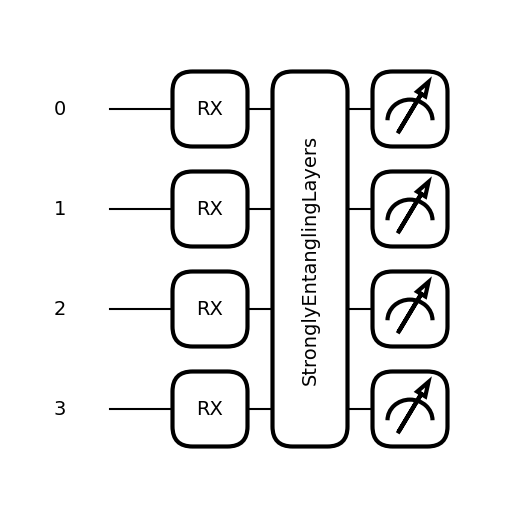

In [10]:
# Call the function to create and visualize the circuit
create_pennylane_circuit()